<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [6]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [17]:
boston_df.shape
boston_df.head()
boston_df.info()
boston_df.describe().T
boston_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  506 non-null    int64   
 1   CRIM        506 non-null    float64 
 2   ZN          506 non-null    float64 
 3   INDUS       506 non-null    float64 
 4   CHAS        506 non-null    float64 
 5   NOX         506 non-null    float64 
 6   RM          506 non-null    float64 
 7   AGE         506 non-null    float64 
 8   DIS         506 non-null    float64 
 9   RAD         506 non-null    float64 
 10  TAX         506 non-null    float64 
 11  PTRATIO     506 non-null    float64 
 12  LSTAT       506 non-null    float64 
 13  MEDV        506 non-null    float64 
 14  AGE_group   506 non-null    category
dtypes: category(1), float64(13), int64(1)
memory usage: 56.0 KB


Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
AGE_group     0
dtype: int64

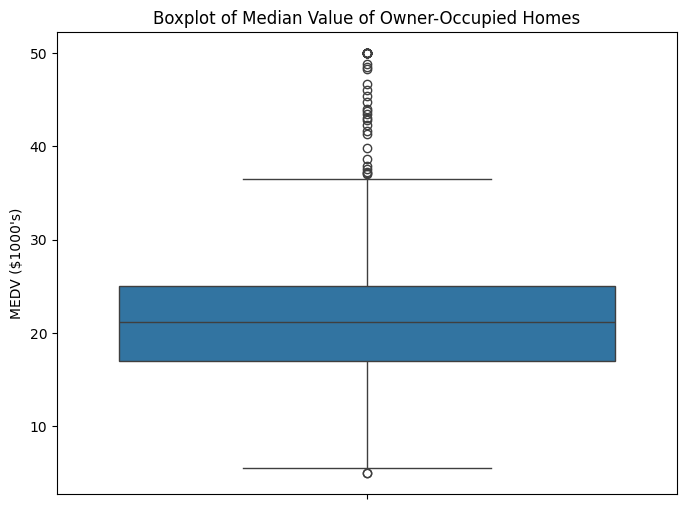

In [7]:
plt.figure(figsize=(8,6))
sns.boxplot(y=boston_df['MEDV'])
plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.ylabel("MEDV ($1000's)")
plt.show()


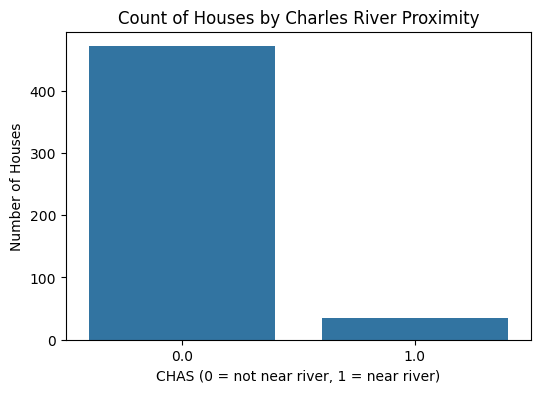

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='CHAS', data=boston_df)
plt.title("Count of Houses by Charles River Proximity")
plt.xlabel("CHAS (0 = not near river, 1 = near river)")
plt.ylabel("Number of Houses")
plt.show()


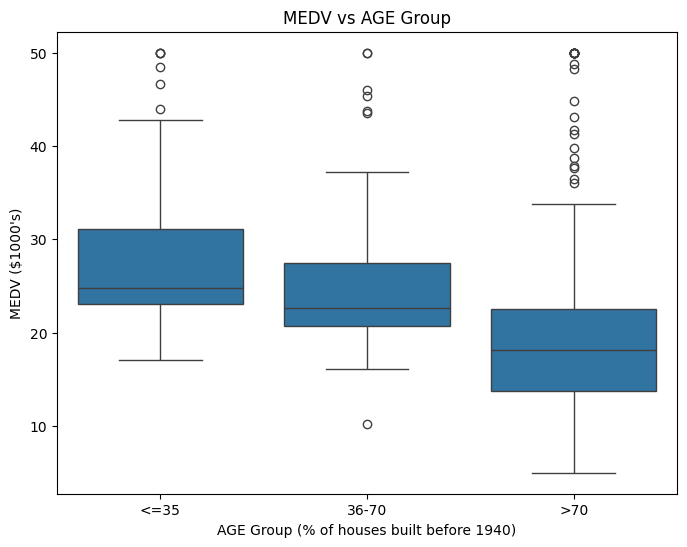

In [9]:
# Discretize AGE
bins = [0, 35, 70, 100]
labels = ['<=35', '36-70', '>70']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

plt.figure(figsize=(8,6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title("MEDV vs AGE Group")
plt.xlabel("AGE Group (% of houses built before 1940)")
plt.ylabel("MEDV ($1000's)")
plt.show()


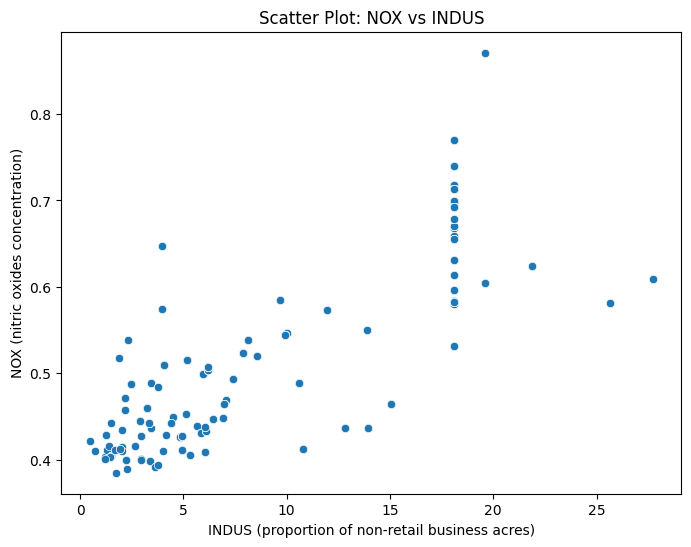

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title("Scatter Plot: NOX vs INDUS")
plt.xlabel("INDUS (proportion of non-retail business acres)")
plt.ylabel("NOX (nitric oxides concentration)")
plt.show()


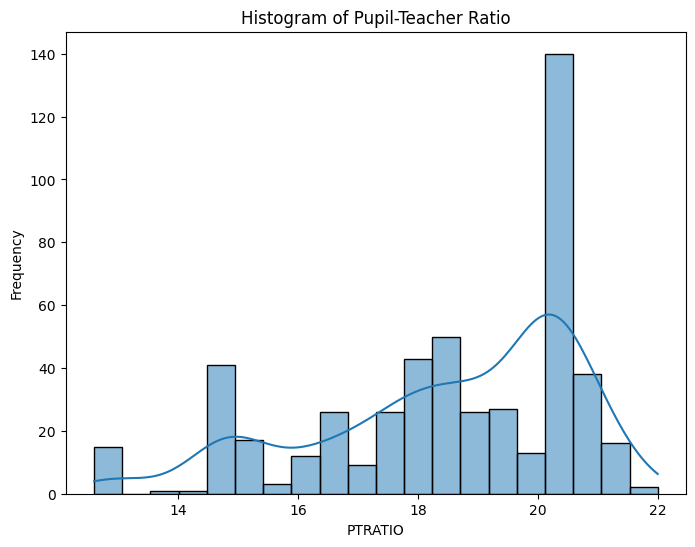

In [11]:
plt.figure(figsize=(8,6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.title("Histogram of Pupil-Teacher Ratio")
plt.xlabel("PTRATIO")
plt.ylabel("Frequency")
plt.show()


#Task 3


In [12]:
from scipy.stats import ttest_ind

# Hypotheses
# H0: No difference in MEDV between CHAS=0 and CHAS=1
# H1: There is a difference

medv_river = boston_df[boston_df['CHAS']==1]['MEDV']
medv_nonriver = boston_df[boston_df['CHAS']==0]['MEDV']

t_stat, p_val = ttest_ind(medv_river, medv_nonriver)
t_stat, p_val


(3.996437466090509, 7.390623170519905e-05)

In [13]:
# Hypotheses
# H0: No difference in MEDV between AGE groups
# H1: At least one group differs

model = ols('MEDV ~ C(AGE_group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(AGE_group),5401.731883,2.0,36.40765,1.710501e-15
Residual,37314.563532,503.0,NaN,NaN


In [14]:
# Hypotheses
# H0: No correlation between NOX and INDUS
# H1: There is correlation

corr_coef, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
corr_coef, p_value


(0.7636514469209192, 7.913361061210442e-98)

In [15]:
# Hypotheses
# H0: β(DIS) = 0 → no impact on MEDV
# H1: β(DIS) ≠ 0 → DIS affects MEDV

X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']

model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 14 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        15:09:40   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""